In [1]:
import mido
from mido import MidiFile

In [3]:
file = MidiFile('data/Midi #8.mid')

In [4]:
message = mido.Message('program_change', program=10)

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [61]:
notes = []
for message in file:
    try:
        notes.append(message.note)
    except AttributeError:
        pass
    
    #plt.plot()
    

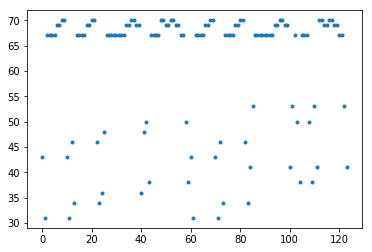

In [7]:
plt.plot(notes,'.')

In [8]:
import keras

Using TensorFlow backend.


In [2]:
from keras.layers import LSTM, Dense, Dropout, Flatten, TimeDistributed

Using TensorFlow backend.


In [78]:
look_back = 13
model = keras.Sequential()
model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))
#model.add(LSTM(1,return_sequences=True, input_shape=(13,1)))
#model.add(Dropout(0.3))
#model.add(LSTM(6, return_sequences=True))
#model.add(Dropout(0.3))
#model.add(LSTM(64))
#model.add(Dense(32))
#model.add(Dropout(0.3))
#model.add(keras.layers.Flatten())
#model.add(keras.layers.TimeDistributed(Dense(1, activation='softmax')))
model.add(Dense(units=1))


In [91]:
model.compile(loss='mse', optimizer='sgd')

In [70]:
sequence_length = 13
# get all pitch names
# note_to_int = np.linspace(0,127,128)
# create a dictionary to map pitches to integers
network_input = []
network_output = []
# create input sequences and the corresponding outputs
for i in range(0, len(notes) - sequence_length, 1):
    sequence_in = [[note] for note in notes[i:i + sequence_length]]
    sequence_out = [notes[i + sequence_length]]

    network_input.append(sequence_in)
    network_output.append(sequence_out)
n_patterns = len(network_input)
network_input = np.array(network_input)
network_output = np.array(network_output)
# reshape the input into a format compatible with LSTM layers
#network_input = numpy.reshape(network_input, (n_patterns, sequence_length, 1))
# normalize input
# network_input = network_input / float(n_vocab)
# network_output = keras.utils.to_categorical(network_output,num_classes=128)

In [3]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append([a])
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [62]:
notes = np.array([[note] for note in notes])

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
notes = scaler.fit_transform(notes)

NameError: name 'notes' is not defined

In [99]:
X, Y = create_dataset(notes)

In [85]:
model.fit(X,Y)

Epoch 1/1
122/122 [==============================] - 9s 77ms/step - loss: 3855.2666


In [101]:
model.fit(X, Y, epochs=2000)

Epoch 1/2000
122/122 [==============================] - 0s 797us/step - loss: 1995.5457
Epoch 2/2000
122/122 [==============================] - 0s 694us/step - loss: 1.3802
Epoch 3/2000
122/122 [==============================] - 0s 830us/step - loss: 7.0679
Epoch 4/2000
122/122 [==============================] - 0s 938us/step - loss: 31.2292
Epoch 5/2000
122/122 [==============================] - 0s 2ms/step - loss: 98.5858
Epoch 6/2000
122/122 [==============================] - 0s 751us/step - loss: 109.7338
Epoch 7/2000
122/122 [==============================] - 0s 878us/step - loss: 103.8851
Epoch 8/2000
122/122 [==============================] - 0s 963us/step - loss: 75.6667
Epoch 9/2000
122/122 [==============================] - 0s 785us/step - loss: 61.4235
Epoch 10/2000
122/122 [==============================] - 0s 760us/step - loss: 45.8177
Epoch 11/2000
122/122 [==============================] - 0s 771us/step - loss: 37.0279
Epoch 12/2000
122/122 [=============================

122/122 [==============================] - 0s 677us/step - loss: 0.6007
Epoch 191/2000
122/122 [==============================] - 0s 760us/step - loss: 0.5899
Epoch 192/2000
122/122 [==============================] - 0s 1ms/step - loss: 0.5775
Epoch 193/2000
122/122 [==============================] - 0s 841us/step - loss: 0.6992
Epoch 194/2000
122/122 [==============================] - 0s 840us/step - loss: 0.7131
Epoch 195/2000
122/122 [==============================] - 0s 854us/step - loss: 0.5893
Epoch 196/2000
122/122 [==============================] - 0s 797us/step - loss: 0.7509
Epoch 197/2000
122/122 [==============================] - 0s 1ms/step - loss: 1.5055
Epoch 198/2000
122/122 [==============================] - 0s 817us/step - loss: 1.7878
Epoch 199/2000
122/122 [==============================] - 0s 741us/step - loss: 0.9920
Epoch 200/2000
122/122 [==============================] - 0s 747us/step - loss: 1.7262
Epoch 201/2000
122/122 [==============================] - 0s 9

122/122 [==============================] - 0s 681us/step - loss: 0.6239
Epoch 379/2000
122/122 [==============================] - 0s 785us/step - loss: 0.7094
Epoch 380/2000
122/122 [==============================] - 0s 774us/step - loss: 0.7215
Epoch 381/2000
122/122 [==============================] - 0s 734us/step - loss: 1.4823
Epoch 382/2000
122/122 [==============================] - 0s 1ms/step - loss: 1.8471
Epoch 383/2000
122/122 [==============================] - 0s 764us/step - loss: 0.9166
Epoch 384/2000
122/122 [==============================] - 0s 895us/step - loss: 0.6348
Epoch 385/2000
122/122 [==============================] - 0s 751us/step - loss: 0.6634
Epoch 386/2000
122/122 [==============================] - 0s 868us/step - loss: 0.6443
Epoch 387/2000
122/122 [==============================] - 0s 790us/step - loss: 0.7347
Epoch 388/2000
122/122 [==============================] - 0s 743us/step - loss: 0.9215
Epoch 389/2000
122/122 [==============================] - 0s

122/122 [==============================] - 0s 947us/step - loss: 1.0785
Epoch 567/2000
122/122 [==============================] - 0s 659us/step - loss: 1.0323
Epoch 568/2000
122/122 [==============================] - 0s 770us/step - loss: 0.6049
Epoch 569/2000
122/122 [==============================] - 0s 691us/step - loss: 0.6250
Epoch 570/2000
122/122 [==============================] - 0s 736us/step - loss: 1.0648
Epoch 571/2000
122/122 [==============================] - 0s 896us/step - loss: 0.7008
Epoch 572/2000
122/122 [==============================] - 0s 652us/step - loss: 0.5891
Epoch 573/2000
122/122 [==============================] - 0s 708us/step - loss: 0.7049
Epoch 574/2000
122/122 [==============================] - 0s 829us/step - loss: 1.0354
Epoch 575/2000
122/122 [==============================] - 0s 781us/step - loss: 0.5806
Epoch 576/2000
122/122 [==============================] - 0s 903us/step - loss: 0.6786
Epoch 577/2000
122/122 [==============================] - 

122/122 [==============================] - 0s 1ms/step - loss: 1.7511
Epoch 755/2000
122/122 [==============================] - 0s 866us/step - loss: 1.8694
Epoch 756/2000
122/122 [==============================] - 0s 1ms/step - loss: 1.0366
Epoch 757/2000
122/122 [==============================] - 0s 1ms/step - loss: 0.6656
Epoch 758/2000
122/122 [==============================] - 0s 941us/step - loss: 0.6570
Epoch 759/2000
122/122 [==============================] - 0s 763us/step - loss: 0.8577
Epoch 760/2000
122/122 [==============================] - 0s 784us/step - loss: 0.8892
Epoch 761/2000
122/122 [==============================] - 0s 777us/step - loss: 1.0209
Epoch 762/2000
122/122 [==============================] - 0s 679us/step - loss: 0.5769
Epoch 763/2000
122/122 [==============================] - 0s 832us/step - loss: 0.6065
Epoch 764/2000
122/122 [==============================] - 0s 2ms/step - loss: 0.9186
Epoch 765/2000
122/122 [==============================] - 0s 1ms/s

122/122 [==============================] - 0s 684us/step - loss: 1.0570
Epoch 943/2000
122/122 [==============================] - 0s 685us/step - loss: 0.6889
Epoch 944/2000
122/122 [==============================] - 0s 679us/step - loss: 0.5624
Epoch 945/2000
122/122 [==============================] - 0s 640us/step - loss: 0.6014
Epoch 946/2000
122/122 [==============================] - 0s 777us/step - loss: 0.5751
Epoch 947/2000
122/122 [==============================] - 0s 837us/step - loss: 0.6392
Epoch 948/2000
122/122 [==============================] - 0s 718us/step - loss: 0.5539
Epoch 949/2000
122/122 [==============================] - 0s 697us/step - loss: 0.5791
Epoch 950/2000
122/122 [==============================] - 0s 620us/step - loss: 0.6190
Epoch 951/2000
122/122 [==============================] - 0s 883us/step - loss: 1.0175
Epoch 952/2000
122/122 [==============================] - 0s 843us/step - loss: 1.5089
Epoch 953/2000
122/122 [==============================] - 

Epoch 1036/2000
122/122 [==============================] - 0s 636us/step - loss: 0.7435
Epoch 1037/2000
122/122 [==============================] - 0s 702us/step - loss: 0.7592
Epoch 1038/2000
122/122 [==============================] - 0s 668us/step - loss: 0.9499
Epoch 1039/2000
122/122 [==============================] - 0s 831us/step - loss: 0.5594
Epoch 1040/2000
122/122 [==============================] - 0s 671us/step - loss: 0.7477
Epoch 1041/2000
122/122 [==============================] - 0s 769us/step - loss: 0.5568
Epoch 1042/2000
122/122 [==============================] - 0s 687us/step - loss: 0.6313
Epoch 1043/2000
122/122 [==============================] - 0s 702us/step - loss: 0.6087
Epoch 1044/2000
122/122 [==============================] - 0s 792us/step - loss: 0.6336
Epoch 1045/2000
122/122 [==============================] - 0s 992us/step - loss: 1.1551
Epoch 1046/2000
122/122 [==============================] - 0s 691us/step - loss: 0.6006
Epoch 1047/2000
122/122 [=======

122/122 [==============================] - 0s 680us/step - loss: 0.9180
Epoch 1130/2000
122/122 [==============================] - 0s 755us/step - loss: 1.7882
Epoch 1131/2000
122/122 [==============================] - 0s 656us/step - loss: 1.3107
Epoch 1132/2000
122/122 [==============================] - 0s 834us/step - loss: 0.6855
Epoch 1133/2000
122/122 [==============================] - 0s 657us/step - loss: 0.9096
Epoch 1134/2000
122/122 [==============================] - 0s 683us/step - loss: 0.8769
Epoch 1135/2000
122/122 [==============================] - 0s 719us/step - loss: 1.1581
Epoch 1136/2000
122/122 [==============================] - 0s 993us/step - loss: 1.9561
Epoch 1137/2000
122/122 [==============================] - 0s 737us/step - loss: 1.3528
Epoch 1138/2000
122/122 [==============================] - 0s 813us/step - loss: 1.3520
Epoch 1139/2000
122/122 [==============================] - 0s 768us/step - loss: 1.2763
Epoch 1140/2000
122/122 [=======================

122/122 [==============================] - 0s 1ms/step - loss: 0.6019
Epoch 1316/2000
122/122 [==============================] - 0s 698us/step - loss: 0.9035
Epoch 1317/2000
122/122 [==============================] - 0s 745us/step - loss: 0.7434
Epoch 1318/2000
122/122 [==============================] - 0s 735us/step - loss: 0.5575
Epoch 1319/2000
122/122 [==============================] - 0s 734us/step - loss: 0.5473
Epoch 1320/2000
122/122 [==============================] - 0s 919us/step - loss: 0.8320
Epoch 1321/2000
122/122 [==============================] - 0s 705us/step - loss: 0.9943
Epoch 1322/2000
122/122 [==============================] - 0s 792us/step - loss: 1.2644
Epoch 1323/2000
122/122 [==============================] - 0s 754us/step - loss: 1.2608
Epoch 1324/2000
122/122 [==============================] - 0s 773us/step - loss: 0.5537
Epoch 1325/2000
122/122 [==============================] - 0s 745us/step - loss: 0.6601
Epoch 1326/2000
122/122 [=========================

122/122 [==============================] - 0s 736us/step - loss: 1.0198
Epoch 1501/2000
122/122 [==============================] - 0s 886us/step - loss: 1.0459
Epoch 1502/2000
122/122 [==============================] - 0s 660us/step - loss: 0.9533
Epoch 1503/2000
122/122 [==============================] - 0s 800us/step - loss: 0.6923
Epoch 1504/2000
122/122 [==============================] - 0s 977us/step - loss: 0.6549
Epoch 1505/2000
122/122 [==============================] - 0s 734us/step - loss: 0.6016
Epoch 1506/2000
122/122 [==============================] - 0s 896us/step - loss: 0.9922
Epoch 1507/2000
122/122 [==============================] - 0s 930us/step - loss: 0.6840
Epoch 1508/2000
122/122 [==============================] - 0s 681us/step - loss: 0.5758
Epoch 1509/2000
122/122 [==============================] - 0s 925us/step - loss: 0.6569
Epoch 1510/2000
122/122 [==============================] - 0s 738us/step - loss: 0.6760
Epoch 1511/2000
122/122 [=======================

122/122 [==============================] - 0s 607us/step - loss: 0.5684
Epoch 1687/2000
122/122 [==============================] - 0s 652us/step - loss: 0.5715
Epoch 1688/2000
122/122 [==============================] - 0s 743us/step - loss: 0.5957
Epoch 1689/2000
122/122 [==============================] - 0s 724us/step - loss: 0.5769
Epoch 1690/2000
122/122 [==============================] - 0s 724us/step - loss: 0.6473
Epoch 1691/2000
122/122 [==============================] - 0s 731us/step - loss: 0.6771
Epoch 1692/2000
122/122 [==============================] - 0s 709us/step - loss: 1.2347
Epoch 1693/2000
122/122 [==============================] - 0s 689us/step - loss: 0.8366
Epoch 1694/2000
122/122 [==============================] - 0s 990us/step - loss: 0.8756
Epoch 1695/2000
122/122 [==============================] - 0s 737us/step - loss: 0.8322
Epoch 1696/2000
122/122 [==============================] - 0s 685us/step - loss: 0.5811
Epoch 1697/2000
122/122 [=======================

122/122 [==============================] - 0s 830us/step - loss: 0.7362
Epoch 1873/2000
122/122 [==============================] - 0s 735us/step - loss: 0.5738
Epoch 1874/2000
122/122 [==============================] - 0s 759us/step - loss: 0.5620
Epoch 1875/2000
122/122 [==============================] - 0s 978us/step - loss: 0.8103
Epoch 1876/2000
122/122 [==============================] - 0s 845us/step - loss: 0.9273
Epoch 1877/2000
122/122 [==============================] - 0s 1ms/step - loss: 1.0094
Epoch 1878/2000
122/122 [==============================] - 0s 746us/step - loss: 0.6317
Epoch 1879/2000
122/122 [==============================] - 0s 703us/step - loss: 0.5636
Epoch 1880/2000
122/122 [==============================] - 0s 713us/step - loss: 0.5577
Epoch 1881/2000
122/122 [==============================] - 0s 733us/step - loss: 0.6273
Epoch 1882/2000
122/122 [==============================] - 0s 724us/step - loss: 0.5774
Epoch 1883/2000
122/122 [=========================

In [102]:
predictions = model.predict(X)

In [104]:
scaler.inverse_transform(predictions)

array([[40.194626],
       [51.510723],
       [60.774403],
       [60.774403],
       [60.774403],
       [60.774403],
       [63.018013],
       [63.018013],
       [64.08727 ],
       [64.08727 ],
       [40.194626],
       [51.510723],
       [38.910126],
       [50.503136],
       [60.774403],
       [60.774403],
       [60.774403],
       [60.774403],
       [63.018013],
       [63.018013],
       [64.08727 ],
       [64.08727 ],
       [38.910126],
       [50.503136],
       [48.718597],
       [39.292126],
       [60.774403],
       [60.774403],
       [60.774403],
       [60.774403],
       [60.774403],
       [60.774403],
       [60.774403],
       [60.774403],
       [63.018013],
       [63.018013],
       [64.08727 ],
       [64.08727 ],
       [63.018013],
       [63.018013],
       [48.718597],
       [39.292126],
       [40.483253],
       [46.24278 ],
       [60.774403],
       [60.774403],
       [60.774403],
       [60.774403],
       [64.08727 ],
       [64.08727 ],


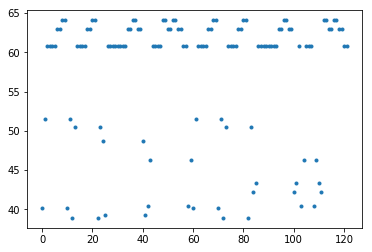

In [107]:
plt.plot(scaler.inverse_transform(predictions),'.')

In [96]:
from sklearn.preprocessing import StandardScaler

In [161]:
import tensorflow as tf
def note_loss(note_t, note_p):
    
    beta = tf.constant(1e2)
    
    note_t = tf.reduce_sum(tf.cumsum(tf.ones_like(note_t)) * tf.exp(beta * note_t) / tf.reduce_sum(tf.exp(beta * note_t))) - 1
    note_p = tf.reduce_sum(tf.cumsum(tf.ones_like(note_p)) * tf.exp(beta * note_p) / tf.reduce_sum(tf.exp(beta * note_p))) - 1
    delta_note = note_p - note_t
    delta_note = tf.cast(delta_note,tf.float32)
    return 10**(delta_note)

In [ ]:
%pylab inline

TypeError: __init__() missing 2 required positional arguments: 'value_index' and 'dtype'

In [49]:
for delta_note in np.linspace(0,11,12):
    loss = 0
    if delta_note<2.5:
        loss = np.exp((delta_note-0)**2/1.5)#*1/4*np.sqrt(np.pi)
    elif delta_note<5.5:
        loss = np.exp((delta_note-4)**2*3)
    else:
        loss = 2.7**((delta_note-7)**2/5)
    print(delta_note, loss)

0.0 1.0
1.0 1.9477340410546757
2.0 14.391916095149892
3.0 20.085536923187668
4.0 1.0
5.0 20.085536923187668
6.0 1.2214027581601699
7.0 1.0
8.0 1.2214027581601699
9.0 2.225540928492468
10.0 6.0496474644129465
11.0 24.532530197109352


In [ ]:
a = 5
loss_dict = {0:0, 1:2.5*a, 2:3*a, 3:2.5*a, 4:0, 5:3*a,6:3*a,7:0,8:3*a,9:3*a,10:3*a,11:2.5*a}

In [12]:
!ls featureToMidi

testing.mid


In [13]:
!open featureToMidi

In [33]:
import os
import mido
import numpy as np
from mido import Message, MidiFile, MidiTrack
import pickle
import sys

MAX_NUM_FILES = 20
MIN_NUM_MESSAGES_PER_FILE = 100

''' 
Returns array of song features.  Goes through first MAX_NUM_FILES in data directory
Periodically saves the data to features.pickle
'''
def getAllFeatureVectors():
    rootdir = os.getcwd() + '/data/'
    
    featureVectors = []
    i = 0
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            #print i
            if (i >= MAX_NUM_FILES):
                break
            
            midiFileName = os.path.join(subdir, file)
            #sys.stdout.write(midiFileName)
            
            #if ("beatle" not in midiFileName.lower()):
            #    continue
            if (not midiFileName.endswith('.mid')):
                continue
            #featureVector = getFeatureVector(midiFileName)
            try:
                featureVector = getFeatureVector(midiFileName)
                #print 'len',len(featureVector)
                if (len(featureVector) >= MIN_NUM_MESSAGES_PER_FILE):
                    #print 'file number: ', os.path.getsize(midiFileName), i, file
                    featureVectors.append(featureVector)
                else:
                    
                    i += -1
            except:
                #print('exception')
                i += -1
            i+=1
                
            #save the data every so often 
            if (i %1000 == 0):
                pickling_on = open("features.pickle","wb")
                pickle.dump(np.array(featureVectors), pickling_on)
                pickling_on.close()
        if (i >= MAX_NUM_FILES):
            break
           
   # Convert to numpy arrays
    return np.array(featureVectors)


def getFeatureVector(midiFileName):
    file = MidiFile(midiFileName)
    
    #Get All the messages
    messages = []
    for message in file:#TODO: TRACKS???
        if message.type in ['note_on','note_off']:
            messages.append(message)
    
    features = []
    note = None
    duration = None
    timeSincePreviousNote = 0.0
    
    i = 0
    for message in messages:
        try:
            timeSincePreviousNote += message.time #TODO: DETERMINE IF THIS IS IN TICKS, IF SO , CHANGE TO SECONDS OR MAYBE NOT. IDK
        except:
            j = 4
            
        #determine if the message is the start of the note
        if (message.type not in ['note_on']):
            continue
        #don't use the percussion channel
        if (message.channel >9):
            continue
        note = message.note
        
        #Find out when the note is finished playing to calculate duration
        '''duration = 0.0
        for futureMessage in messages[i:]:
            if (type(futureMessage.time) is float or type(futureMessage.time) is int):
                duration += float(futureMessage.time)
            if futureMessage.type in ['note_off']:
                if futureMessage.note == note:
                    break
        '''
        #newFeatureVector = [note, velocity, duration, timeSincePreviousNote, message.channel]
        #noteVect = np.zeros(128)
        #noteVect[note] = 1
        
        newFeatureVector = [note, timeSincePreviousNote, message.velocity]
        features.append(newFeatureVector)
        
        timeSincePreviousNote = 0.0
        i += 1
       
    return np.array(features)
   
featureVectors = getAllFeatureVectors()

#print featureVectors[0]

pickling_on = open("beatles_features.pickle","wb")
pickle.dump(featureVectors, pickling_on)
pickling_on.close()

In [54]:
features = np.concatenate(getAllFeatureVectors())

In [55]:
shape(features)

(3897, 3)

In [56]:
scaler = StandardScaler()

In [57]:
features = scaler.fit_transform(features)

In [60]:
X2, Y2 = create_dataset(features)

In [59]:
def create_dataset(dataset, look_back=3):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:
import keras

In [65]:
look_back = 3
model = keras.Sequential()
model.add(LSTM(48, input_shape=(3, 3)))

#model.add(LSTM(1,return_sequences=True, input_shape=(13,1)))
#model.add(Dropout(0.3))
#model.add(LSTM(12))
#model.add(Dropout(0.3))
#model.add(LSTM(12))
model.add(Dense(24))
#model.add(Dropout(0.3))
#model.add(keras.layers.Flatten())
#model.add(keras.layers.TimeDistributed(Dense(1, activation='softmax')))
#model.add(Dense(units=2))
model.add(Dense(3, activation='linear'))
model.compile(loss='mse', optimizer='sgd')

In [66]:
model.fit(X2, Y2
          , epochs=100)

Epoch 1/100
3893/3893 [==============================] - 2s 502us/step - loss: 0.9880
Epoch 2/100
3893/3893 [==============================] - 1s 208us/step - loss: 0.9614
Epoch 3/100
3893/3893 [==============================] - 1s 208us/step - loss: 0.9446
Epoch 4/100
3893/3893 [==============================] - 1s 217us/step - loss: 0.9335
Epoch 5/100
3893/3893 [==============================] - 1s 223us/step - loss: 0.9261
Epoch 6/100
3893/3893 [==============================] - 1s 231us/step - loss: 0.9213
Epoch 7/100
3893/3893 [==============================] - 1s 199us/step - loss: 0.9176
Epoch 8/100
3893/3893 [==============================] - 1s 235us/step - loss: 0.9147
Epoch 9/100
3893/3893 [==============================] - 1s 245us/step - loss: 0.9124
Epoch 10/100
3893/3893 [==============================] - 1s 240us/step - loss: 0.9100
Epoch 11/100
3893/3893 [==============================] - 1s 248us/step - loss: 0.9078
Epoch 12/100
3893/3893 [============================

3893/3893 [==============================] - 1s 232us/step - loss: 0.7848
Epoch 96/100
3893/3893 [==============================] - 1s 212us/step - loss: 0.7828
Epoch 97/100
3893/3893 [==============================] - 1s 234us/step - loss: 0.7808
Epoch 98/100
3893/3893 [==============================] - 1s 211us/step - loss: 0.7783
Epoch 99/100
3893/3893 [==============================] - 1s 216us/step - loss: 0.7761
Epoch 100/100
3893/3893 [==============================] - 1s 206us/step - loss: 0.7739


In [67]:
Y_hat = model.predict(X2)

In [23]:
import seaborn as sns
sns.set_style('darkgrid')

In [68]:
Y_hat

array([[ 0.7166391 , -0.12023745, -0.03724909],
       [ 0.7168887 ,  0.05233854,  0.08632386],
       [ 0.72470576,  0.08964669,  0.14873257],
       ...,
       [-0.34180415, -0.3976169 , -0.18748423],
       [-0.360519  ,  0.36732563, -0.5765101 ],
       [-0.22899117,  0.81024516, -0.4173819 ]], dtype=float32)

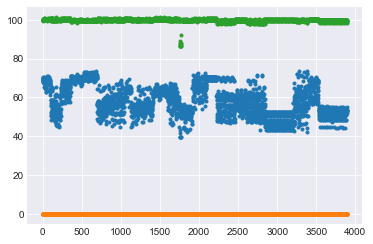

In [69]:
plt.plot(scaler.inverse_transform(Y_hat),'.')

In [70]:
scaler.inverse_transform(Y_hat)

array([[6.9030693e+01, 9.6764714e-02, 9.9690567e+01],
       [6.9034355e+01, 1.2288289e-01, 9.9964554e+01],
       [6.9149033e+01, 1.2852922e-01, 1.0010293e+02],
       ...,
       [5.3502922e+01, 5.4785270e-02, 9.9357468e+01],
       [5.3228367e+01, 1.7055398e-01, 9.8494926e+01],
       [5.5157932e+01, 2.3758677e-01, 9.8847740e+01]], dtype=float32)

In [32]:
from mido import Message, MidiFile, MidiTrack

#turn the feature vector back into a MIDI file
def featuresToMidi(features, fileName):
    directory = "featureToMidi"
    mid = MidiFile(type=0)
    track = MidiTrack()
    mid.tracks.append(track)
    
    #track.append(Message('program_change', program=12, time=0))
    
    withTimeFromStart = []
    timeFromStart = 0
    
    for feature in features:
        note = feature[0]
        
        deltaTime = feature[1]
        timeFromStart += deltaTime
        
        velocity = feature[2]
        
        withTimeFromStart.append(np.array(['note_on', note, deltaTime, velocity, timeFromStart]))
        #withTimeFromStart.append(np.array(['note_off', note, velocity, duration, timeFromStart+duration]))
        
    withTimeFromStart = np.array(withTimeFromStart)
    
    #sortedIndicies = withTimeFromStart[:,4].sort(axis=0)
    #withTimeFromStart = withTimeFromStart[sortedIndicies][0]
       
    currTime = 0.0
    for m in withTimeFromStart:
        prevTime = currTime
    
        currTime = float(m[4])
        
        n = int(round(float(m[1])))
        
        t = currTime - prevTime
        #TIME IS STORED IN TICKS NOT SECONDS.  SO IM GONNA JUST GUESS HERE
        tempo = mido.bpm2tempo(128)
        t = mido.second2tick(t, 500 , tempo)#second, ticks_per_beat, tempo)
        #print currTime, t, m[0]
        track.append(Message(type=m[0], note=n, velocity=int(round(float(m[3]))), channel=4, time=abs(int(round(t)))))
    
    cwd = os.getcwd()
    rootdir = (cwd + '/' + directory + '/')
    mid.save(directory + "/" + fileName)
    
    '''port = mido.open_output()
    #port.send(msg)
    for msg in MidiFile(directory + "/" + fileName).play():
        port.send(msg)'''

i = 0
for f in featureVectors:
    #print(i)
    featuresToMidi(f, 'beatles'+str(i)+'.mid')
    i+=1
#featuresToMidi(featureVectors[44], 'testing.mid')

IndexError: index 2 is out of bounds for axis 0 with size 2

### Functional form of loss function: